In [1]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [9]:
df_cardiap = pd.read_csv("/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/jsons/discordances_indexes.csv", sep=",")
del df_cardiap['Unnamed: 0']

In [4]:
ax = sns.scatterplot(x="DI", y="Tratamiento", hue="Frecuencia", data=df)

ValueError: Could not interpret value `Tratamiento` for parameter `y`

C:\Users\Leand\PyMOL\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Leand\PyMOL\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


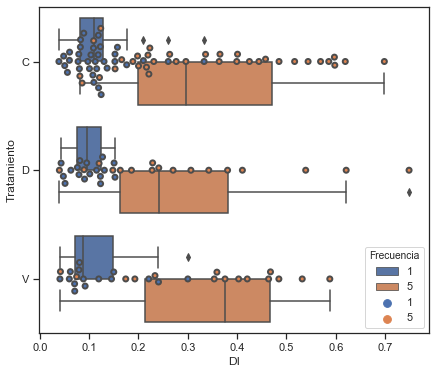

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))


sns.boxplot(x="DI", y="Tratamiento", hue="Frecuencia", data=df)

sns.swarmplot(x="DI", y="Tratamiento", hue="Frecuencia", data=df, linewidth=2)
# plt.savefig('AR')

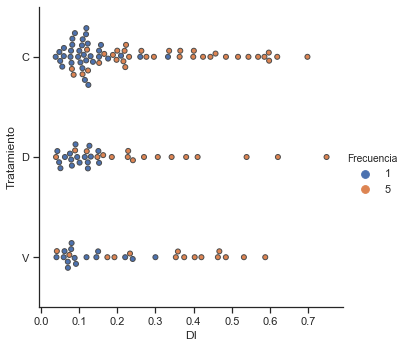

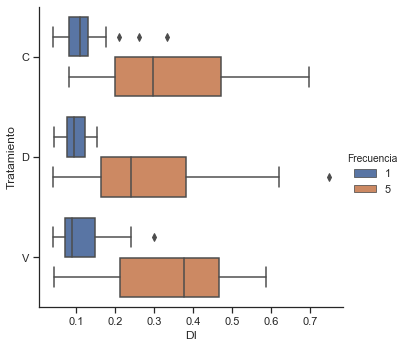

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

sns.catplot(x="DI", y="Tratamiento", hue="Frecuencia", data=df, linewidth=1, kind="swarm")

sns.catplot(x="DI", y="Tratamiento", hue="Frecuencia", data=df, kind="box")
# plt.savefig('AR1')

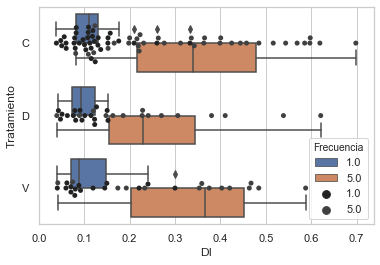

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.boxplot(x="DI", y="Tratamiento", hue="Frecuencia", data=df)
ax = sns.swarmplot(x="DI", y="Tratamiento", hue="Frecuencia", data=df, color=".25")

plt.show()

In [3]:
tab = pd.read_csv('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/seleccion/tabulado_imagenes.csv', encoding='utf-8')
del tab['Unnamed: 0']
pd.set_option('display.max_rows', None)
tab.head()

,experimento,carpeta,foto,tratamiento,frecuencia,dosis
0,31019,031019c2,c2c000,vk,3,5
1,31019,031019c2,c2d000,vk,4,5
2,31019,031019c2,c2e000,vk,5,5
3,31019,031019c2,c2b000,vk,1,5
4,31019,031019c3,c3c000,d,3,5


In [4]:
for j in range(0,len(df)):
    for i in range(0,len(tab)):
        if str(tab['experimento'][i]) in df['photo_name'][j]:
            if str(tab['foto'][i]) in df['photo_name'][j]:
                tab.loc[i,'DI'] = df['DI'][j]

In [5]:
def DI_normalizate(tratamiento, frecuencia):
    controles1 = tab[(tab['tratamiento']=='c') & (tab['frecuencia']==frecuencia)]
    list_exp = list(controles1['experimento'].drop_duplicates())
    tabla = pd.DataFrame()
    for i in list_exp:
        try:
            mean_control = controles1[controles1['experimento'] ==  i]['DI'].mean()
            vk1 = tab[(tab['tratamiento']==tratamiento) & (tab['frecuencia']==frecuencia) & (tab['experimento']==i)]
            vk1 = vk1.assign (DI_normal = vk1['DI']/mean_control)
            tabla = tabla.append(vk1)
        except:
            vk1 = vk1.assign (DI_normal = 'NaN')
            tabla = tabla.append(vk1)
    return tabla

In [6]:
DI_normalizate('vk', 5).head()

,experimento,carpeta,foto,tratamiento,frecuencia,dosis,DI,DI_normal
2,31019,031019c2,c2e000,vk,5,5,NaN,NaN
10,31019,031019c5,c5E000,vk,5,5,0.480849,0.929774
29,180221,180221,vk3d000,vk,5,5,0.340715,NaN
30,180221,180221,vk2d000,vk,5,5,0.173013,NaN
34,180221,180221,vk4d000,vk,5,5,NaN,NaN


In [20]:
vk_1_1 = DI_normalizate('vk', 1)[DI_normalizate('vk', 1)['dosis'] == 1]['DI_normal'].mean()
vk_1_3 = DI_normalizate('vk', 3)[DI_normalizate('vk', 3)['dosis'] == 1]['DI_normal'].mean()
vk_1_4 = DI_normalizate('vk', 4)[DI_normalizate('vk', 4)['dosis'] == 1]['DI_normal'].mean()
vk_1_5 = DI_normalizate('vk', 5)[DI_normalizate('vk', 5)['dosis'] == 1]['DI_normal'].mean()
vk_5_1 = DI_normalizate('vk', 1)[DI_normalizate('vk', 1)['dosis'] == 5]['DI_normal'].mean()
vk_5_3 = DI_normalizate('vk', 3)[DI_normalizate('vk', 3)['dosis'] == 5]['DI_normal'].mean()
vk_5_4 = DI_normalizate('vk', 4)[DI_normalizate('vk', 4)['dosis'] == 5]['DI_normal'].mean()
vk_5_5 = DI_normalizate('vk', 5)[DI_normalizate('vk', 5)['dosis'] == 5]['DI_normal'].mean()
vk_10_1 = DI_normalizate('vk', 1)[DI_normalizate('vk', 1)['dosis'] == 10]['DI_normal'].mean()
vk_10_3 = DI_normalizate('vk', 3)[DI_normalizate('vk', 3)['dosis'] == 10]['DI_normal'].mean()
vk_10_4 = DI_normalizate('vk', 4)[DI_normalizate('vk', 4)['dosis'] == 10]['DI_normal'].mean()
vk_10_5 = DI_normalizate('vk', 5)[DI_normalizate('vk', 5)['dosis'] == 10]['DI_normal'].mean()

In [21]:
d_1_1 = DI_normalizate('d', 1)[DI_normalizate('d', 1)['dosis'] == 1]['DI_normal'].mean()
d_1_3 = DI_normalizate('d', 3)[DI_normalizate('d', 3)['dosis'] == 1]['DI_normal'].mean()
d_1_4 = DI_normalizate('d', 4)[DI_normalizate('d', 4)['dosis'] == 1]['DI_normal'].mean()
d_1_5 = DI_normalizate('d', 5)[DI_normalizate('d', 5)['dosis'] == 1]['DI_normal'].mean()
d_5_1 = DI_normalizate('d', 1)[DI_normalizate('d', 1)['dosis'] == 5]['DI_normal'].mean()
d_5_3 = DI_normalizate('d', 3)[DI_normalizate('d', 3)['dosis'] == 5]['DI_normal'].mean()
d_5_4 = DI_normalizate('d', 4)[DI_normalizate('d', 4)['dosis'] == 5]['DI_normal'].mean()
d_5_5 = DI_normalizate('d', 5)[DI_normalizate('d', 5)['dosis'] == 5]['DI_normal'].mean()
d_10_1 = DI_normalizate('d', 1)[DI_normalizate('d', 1)['dosis'] == 10]['DI_normal'].mean()
d_10_3 = DI_normalizate('d', 3)[DI_normalizate('d', 3)['dosis'] == 10]['DI_normal'].mean()
d_10_4 = DI_normalizate('d', 4)[DI_normalizate('d', 4)['dosis'] == 10]['DI_normal'].mean()
d_10_5 = DI_normalizate('d', 5)[DI_normalizate('d', 5)['dosis'] == 10]['DI_normal'].mean()

In [22]:
Error_vk_1_1 = scipy.stats.sem(DI_normalizate('vk', 1)[DI_normalizate('vk', 1)['dosis'] == 1]['DI_normal'])
Error_vk_1_3 = scipy.stats.sem(DI_normalizate('vk', 3)[DI_normalizate('vk', 3)['dosis'] == 1]['DI_normal'])
Error_vk_1_4 = scipy.stats.sem(DI_normalizate('vk', 4)[DI_normalizate('vk', 4)['dosis'] == 1]['DI_normal'])
Error_vk_1_5 = scipy.stats.sem(DI_normalizate('vk', 5)[DI_normalizate('vk', 5)['dosis'] == 1]['DI_normal'])
Error_vk_5_1 = scipy.stats.sem(DI_normalizate('vk', 1)[DI_normalizate('vk', 1)['dosis'] == 5]['DI_normal'])
Error_vk_5_3 = scipy.stats.sem(DI_normalizate('vk', 3)[DI_normalizate('vk', 3)['dosis'] == 5]['DI_normal'])
Error_vk_5_4 = scipy.stats.sem(DI_normalizate('vk', 4)[DI_normalizate('vk', 4)['dosis'] == 5]['DI_normal'])
Error_vk_5_5 = scipy.stats.sem(DI_normalizate('vk', 5)[DI_normalizate('vk', 5)['dosis'] == 5]['DI_normal'])
Error_vk_10_1 = scipy.stats.sem(DI_normalizate('vk', 1)[DI_normalizate('vk', 1)['dosis'] == 10]['DI_normal'])
Error_vk_10_3 = scipy.stats.sem(DI_normalizate('vk', 3)[DI_normalizate('vk', 3)['dosis'] == 10]['DI_normal'])
Error_vk_10_4 = scipy.stats.sem(DI_normalizate('vk', 4)[DI_normalizate('vk', 4)['dosis'] == 10]['DI_normal'])
Error_vk_10_5 = scipy.stats.sem(DI_normalizate('vk', 5)[DI_normalizate('vk', 5)['dosis'] == 10]['DI_normal'])

In [23]:
Error_d_1_1 = scipy.stats.sem(DI_normalizate('d', 1)[DI_normalizate('d', 1)['dosis'] == 1]['DI_normal'])
Error_d_1_3 = scipy.stats.sem(DI_normalizate('d', 3)[DI_normalizate('d', 3)['dosis'] == 1]['DI_normal'])
Error_d_1_4 = scipy.stats.sem(DI_normalizate('d', 4)[DI_normalizate('d', 4)['dosis'] == 1]['DI_normal'])
Error_d_1_5 = scipy.stats.sem(DI_normalizate('d', 5)[DI_normalizate('d', 5)['dosis'] == 1]['DI_normal'])
Error_d_5_1 = scipy.stats.sem(DI_normalizate('d', 1)[DI_normalizate('d', 1)['dosis'] == 5]['DI_normal'])
Error_d_5_3 = scipy.stats.sem(DI_normalizate('d', 3)[DI_normalizate('d', 3)['dosis'] == 5]['DI_normal'])
Error_d_5_4 = scipy.stats.sem(DI_normalizate('d', 4)[DI_normalizate('d', 4)['dosis'] == 5]['DI_normal'])
Error_d_5_5 = scipy.stats.sem(DI_normalizate('d', 5)[DI_normalizate('d', 5)['dosis'] == 5]['DI_normal'])
Error_d_10_1 = scipy.stats.sem(DI_normalizate('d', 1)[DI_normalizate('d', 1)['dosis'] == 10]['DI_normal'])
Error_d_10_3 = scipy.stats.sem(DI_normalizate('d', 3)[DI_normalizate('d', 3)['dosis'] == 10]['DI_normal'])
Error_d_10_4 = scipy.stats.sem(DI_normalizate('d', 4)[DI_normalizate('d', 4)['dosis'] == 10]['DI_normal'])
Error_d_10_5 = scipy.stats.sem(DI_normalizate('d', 5)[DI_normalizate('d', 5)['dosis'] == 10]['DI_normal'])

In [24]:
x = [1,3,4,5]
y1 = [vk_1_1, vk_1_3, vk_1_4, vk_1_5]
y2 = [vk_5_1, vk_5_3, vk_5_4, vk_5_5]
y3 = [vk_10_1, vk_10_3, vk_10_4, vk_10_5]

y1_err = [Error_vk_1_1, Error_vk_1_3, Error_vk_1_4, Error_vk_1_5]
y2_err = [Error_vk_5_1, Error_vk_5_3, Error_vk_5_4, Error_vk_5_5]
y3_err = [Error_vk_10_1, Error_vk_10_3, Error_vk_10_4, Error_vk_10_5]

In [25]:
x = [1,3,4,5]
yd1 = [d_1_1, d_1_3, d_1_4, d_1_5]
yd2 = [d_5_1, d_5_3, d_5_4, d_5_5]
yd3 = [d_10_1, d_10_3, d_10_4, d_10_5]

yd1_err = [Error_d_1_1, Error_d_1_3, Error_d_1_4, Error_d_1_5]
yd2_err = [Error_d_5_1, Error_d_5_3, Error_d_5_4, Error_d_5_5]
yd3_err = [Error_d_10_1, Error_d_10_3, Error_d_10_4, Error_d_10_5]

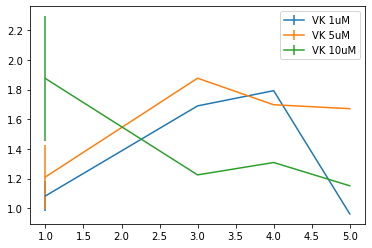

In [26]:
plt.errorbar (x, y1, yerr = y1_err)
plt.errorbar (x, y2, yerr = y2_err)
plt.errorbar (x, y3, yerr = y3_err)

plt.legend (['VK 1uM','VK 5uM','VK 10uM'])
# plt.savefig(path+'DI_treatment')

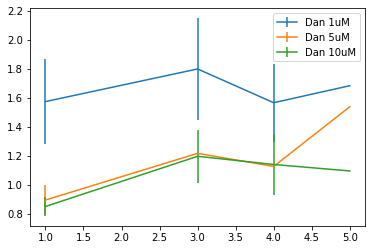

In [27]:
plt.errorbar (x, yd1, yerr = yd1_err)
plt.errorbar (x, yd2, yerr = yd2_err)
plt.errorbar (x, yd3, yerr = yd3_err)

plt.legend (['Dan 1uM','Dan 5uM','Dan 10uM'])
# plt.savefig(path+'DI_treatment')